# Exercice 2

Lorsqu'une suite $(u_n)$ tend vers une limite $\ell$, il est important de pouvoir mesurer à quelle vitesse a lieu cette convergence. Vous verrez de manière plus approfondie cette notion ultérieurement. Ici, nous nous contenterons d'essayer de visualiser cette notion.

Nous définissons $e_n=|u_n-\ell|$, pour $n\in\mathbb{N}$. L'ordre de convergence, noté $p$, d'une suite est définie par
- $p=1$ si $\exists K\in]0,1[ : e_{n+1} \leq Ke_n$ ;
- $p>1$ si $\exists K > 0 : e_{n+1} \leq Ke_n^p$.

Afin de visualiser l'ordre de convergence, nous traçons le nuage de points $(e_n, e_{n+1})$ en échelle logarithmique. Si le nuage de points s'organise le long d'une droite de pente $p$, l'ordre de convergence est alors cette pente $p$.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

UPS_primary = (0.38823529411764707, 0.0, 0.23529411764705882)
UPS_gris = (49/255, 62/255, 72/255)
UPS_bleu = (0.0, 0.3058823529411765, 0.49019607843137253)
UPS_orange = (0.9333333333333333, 0.20392156862745098, 0.13725490196078433)
UPS_vert = (0.0, 0.5019607843137255, 0.47843137254901963)

:::{admonition} Les suites géométriques
:class: admonition-exercice
Il est reconnu que les suites géométriques de raison $a\in]-1,1[$ convergent vers 0 rapidement. Voyons cela...

1. Proposez une fonction `suite_geometrique(a, N)` qui prend en argument un réel $a$ et un entier $N$ et qui retourne les $N$ premiers termes de la suite définie par $u_0 = 1$, $u_{n+1} = au_n$.
2. Tracez dans une fenêtre graphique le nuage de points $(e_n,e_{n+1})$ en échelle logarithmique pour différentes valeurs de $a$ ($a\in\lbrace 0.9, 0.5, 0.25, 0.1\rbrace$.
3. Déterminez la pente des nuages de points (vous pourrez utiliser `np.polyfit`) et ajoutez une légende contenant la valeur de $a$ et la pente obtenue.
4. Les suites géométriques sont-elles donc rapides à converger ? Analysez les résultats.

:::

In [2]:
def suite_geometrique(a, N):
    """
    retourne les N premiers termes de la suite géométrique de raison a
    """
    u = np.ones((N,))
    for k in range(N-1):
        u[k+1] = a*u[k]
    return u

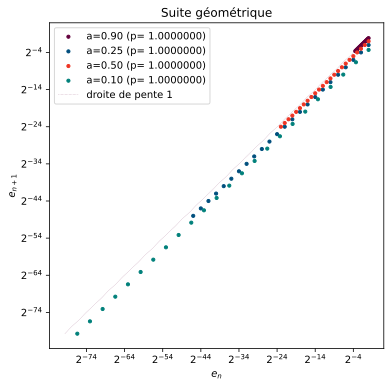

In [3]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)

liste_a = [0.9, 0.25, 0.5, 0.1]
colors = [UPS_primary, UPS_bleu, UPS_orange, UPS_vert]
for a, c in zip(liste_a, colors):
    un = suite_geometrique(a, 25)
    en = abs(un - 0.)
    pente = np.polyfit(np.log(en[:-1]), np.log(en[1:]), 1)[0]
    label = f"a={a:4.2f} (p={pente:10.7f})"
    ax.scatter(en[:-1], en[1:], s=10, color=c, label=label)

ax.plot(
    en, en,
    linestyle='dotted', linewidth=0.5, alpha=0.5, color=UPS_primary,
    label='droite de pente 1'
)
ax.set_title('Suite géométrique')
ax.set_xlabel(r"$e_n$")
ax.set_ylabel(r"$e_{n+1}$")
ax.legend()
plt.show()

:::{admonition} Des suites plus rapides
:class: admonition-exercice
Reprenez la question précédente en utilisant cette fois les suites définies par $u_n = u_{n-1}^k$, $u_0 = 0.99$ avec $k\in\lbrace 2, 3\rbrace$.
:::

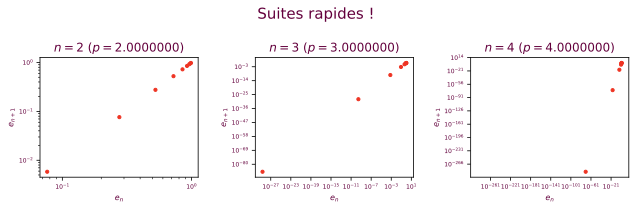

In [4]:
def suite(u0, n, N):
    u = np.zeros((N,))
    u[0] = u0
    for k in range(N-1):
        u[k+1] = u[k]**n
    return u

u0 = .99
listeN = [2, 3, 4]

fig = plt.figure(figsize=(3*len(listeN), 3))

for k, n in enumerate(listeN):
    ax = fig.add_subplot(1, len(listeN), k+1)
    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=10)

    un = suite(u0, n, 10)
    en = abs(un)
    pente = np.log(en[1]) / np.log(en[0])
    label = f"$n={n}$ ($p={pente:10.7f}$)"
    ax.scatter(en[:-1], en[1:], s=10, color=UPS_orange)

    ax.set_title(label, color=UPS_primary)
    ax.set_xlabel(r"$e_n$", fontsize=8, color=UPS_primary)
    ax.set_ylabel(r"$e_{n+1}$", fontsize=8, color=UPS_primary)
    ax.tick_params(
            labelsize=6, labelcolor=UPS_primary
        )
fig.suptitle("Suites rapides !", fontsize=15, color=UPS_primary)
fig.tight_layout()